In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Klasyfikacja binarna
y_train_9 = (y_train == '9')
y_test_9 = (y_test == '9')

In [3]:
from sklearn.linear_model import SGDClassifier

# Uczenie klasyfikatora
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

In [4]:
from sklearn.model_selection import cross_val_score

# Ocena poprzez 3-krotny sprawdzian krzyżowy
cross_val_score(sgd_classifier, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.9456 , 0.95195, 0.9509 ])

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# Ocena poprzez macierz pomyłek
y_train_9_prediction = cross_val_predict(sgd_classifier, X_train, y_train_9, cv=3)
cm = confusion_matrix(y_train_9, y_train_9_prediction)
print(cm)

[[52715  1336]
 [ 1695  4254]]


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precyzja: ', precision_score(y_train_9, y_train_9_prediction))
print('pełność: ', recall_score(y_train_9, y_train_9_prediction))
print('śr. harmoniczna F1: ', f1_score(y_train_9, y_train_9_prediction))

precyzja:  0.7610017889087657
pełność:  0.7150781643973777
śr. harmoniczna F1:  0.737325591472398


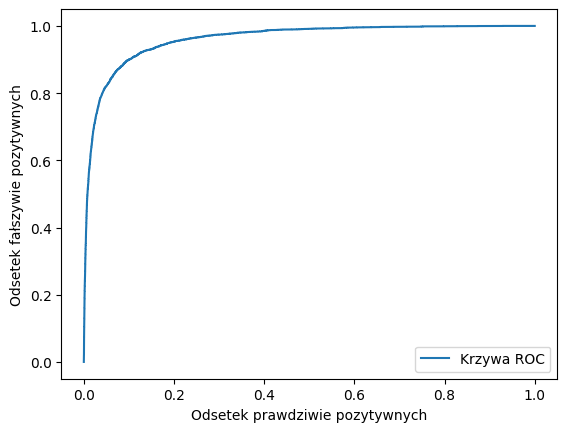

In [7]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Wyniki decyzyjne zamiast przewidywań
y_scores_9 = cross_val_predict(sgd_classifier, X_train, y_train_9, cv=3, method='decision_function')

# Ocena poprzez krzywą ROC
false_positive_rates, true_positive_rates, thresholds = roc_curve(y_train_9, y_scores_9)
plt.plot(false_positive_rates, true_positive_rates, label='Krzywa ROC')
plt.xlabel('Odsetek prawdziwie pozytywnych')
plt.ylabel('Odsetek fałszywie pozytywnych')
plt.legend()
plt.show()


In [8]:
# obszar pod krzywą
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores_9)

0.96114559368217

In [9]:
# zastosowanie klasyfikatora lasu losowego
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [10]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.99, 0.01],
       [1.  , 0.  ]])

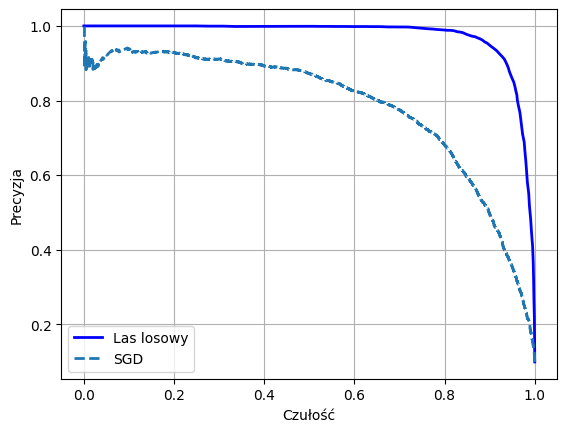

In [11]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores_9)
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_9, y_scores_forest)

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2, label='Las losowy')
plt.plot(recalls, precisions, '--', linewidth=2, label="SGD")
plt.xlabel("Czułość")
plt.ylabel("Precyzja")
plt.grid(visible=True)
plt.legend()
plt.show()

Klasyfikacja wieloklasowa

In [12]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [13]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

Analiza błędów

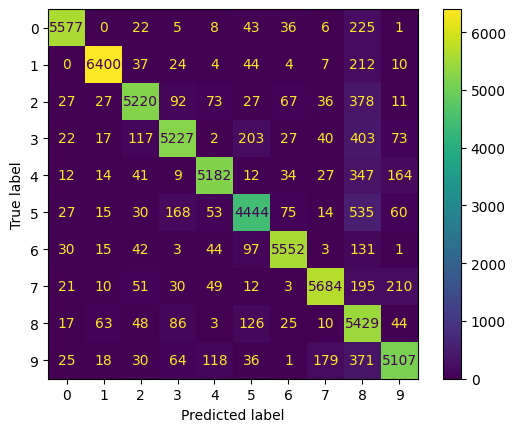

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

y_train_pred = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

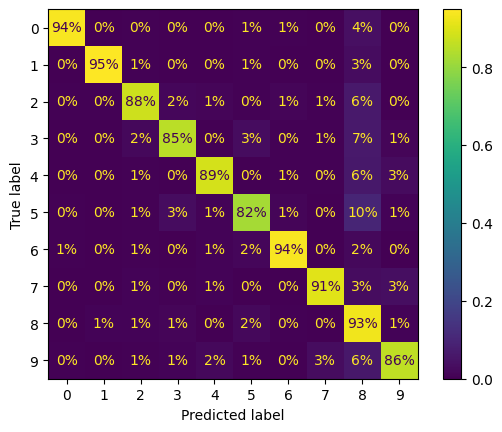

In [17]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

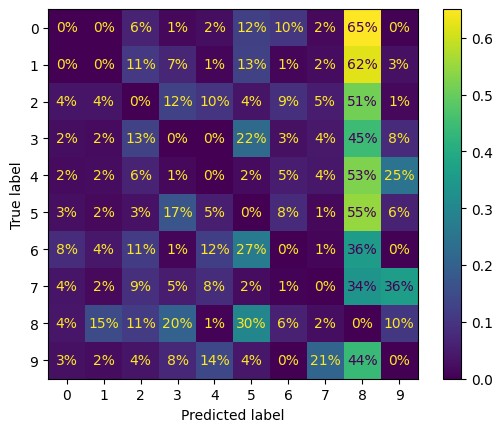

In [18]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()